## <p style="font-family: Times New Roman; font-size:1.4em;color:black;"> Redes Neurais e Deep Learning usando Framework Keras </p>
<p style="font-family: Times New Roman; font-size:1.2em;color:blue;"> Objetivo: Exercitar a aplicação o Algoritmo de Redes Neurais e Deep Learning, utilizando o Framework Keras, a fim de construir um programa de reconhecimento de imagens de escritas numéricas que também possibilite a realização de ajuste fino e análise comparativa do comportamento entre os dados de treino e de teste do Dataset utilizado, visando evitar underfiting e/ou overfiting. </p>

In [1]:
# OBS: O comando warning abaixo é para evitar de aparecer as mensagens de warnings, error, etc:
import warnings
warnings.filterwarnings('ignore')
# Comando para importar/abrir um arquivo:
import keras
from keras.datasets import mnist

In [2]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
y_treino

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# IPC: Para treinar uma Rede Neural em um Dataset, é preciso que a variável target apresente um neurônio para cada classe.
# Logo, devemos transformar os dados para o formato de uma matriz, onde cada coluna da matriz seja alimentada para um neurônio.
# Portanto, para colocar no formato descrito, utilizamos a ferramenta de One Hot Encoding:
from keras.utils import np_utils
y_treino_convertido = np_utils.to_categorical(y_treino) #Convertendo a coluna de valores numa matriz de classes (One Hot Encode)
y_teste_convertido = np_utils.to_categorical(y_teste)

In [5]:
y_treino_convertido

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

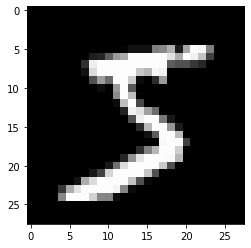

In [6]:
# Comando para mostrar a imagem/o gráfico:
import matplotlib.pyplot as plt
plt.imshow(x_treino[0], cmap='gray')

In [7]:
# Comandos para importar pacotes e funções importantes:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [8]:
x_treino.shape

(60000, 28, 28)

In [9]:
# Comando para transformar as 3 dimensões (60.000, 28, 28) em 2 dimensões (60.000, 784 = 28x28), usando a função ".reshape()":
x_treino_remodelado = x_treino.reshape((60000, 784))
x_teste_remodelado = x_teste.reshape((10000, 784))

In [10]:
# Comando para normalizar os valores diferentes de zero dentro da matriz de imagem, usando a função ".astype()":
x_treino_normalizado = x_treino_remodelado.astype('float32')/255
x_teste_normalizado = x_teste_remodelado.astype('float32')/255

In [11]:
x_treino_normalizado[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
# Comando para definir o modelo:
modelo = Sequential()
modelo.add(Dense(30, input_dim=784, kernel_initializer='normal', activation='relu')) # Entrada e Primeira Camada Oculta
modelo.add(Dense(30, kernel_initializer='normal', activation='relu')) # Segunda Camada Oculta
modelo.add(Dense(10, kernel_initializer='normal', activation='softmax')) # Saída

In [13]:
# Comando para importar a função importante:
from keras.optimizers import SGD
otimizador = SGD()

In [14]:
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc']) # 'acc' é a métrica da acurácia!
historico = modelo.fit(x_treino_normalizado, y_treino_convertido, epochs=40, batch_size=100, validation_data=(x_teste_normalizado, y_teste_convertido), verbose=1)
# OBS: Foi utilizada uma variável chamada 'historico', para permitir criar um gráfico posteriormento, usando os dados armazenados na variável criada.

Epoch 1/40
600/600 [==============================] - 1s 2ms/step - loss: 2.2889 - acc: 0.1381 - val_loss: 2.2663 - val_acc: 0.1641
Epoch 2/40
600/600 [==============================] - 1s 1ms/step - loss: 2.1485 - acc: 0.2860 - val_loss: 1.8735 - val_acc: 0.5118
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 1.3205 - acc: 0.6355 - val_loss: 0.9094 - val_acc: 0.7326
Epoch 4/40
600/600 [==============================] - 2s 3ms/step - loss: 0.7566 - acc: 0.7735 - val_loss: 0.6204 - val_acc: 0.8100
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5617 - acc: 0.8350 - val_loss: 0.4941 - val_acc: 0.8544
Epoch 6/40
600/600 [==============================] - 1s 1ms/step - loss: 0.4699 - acc: 0.8639 - val_loss: 0.4333 - val_acc: 0.8712
Epoch 7/40
600/600 [==============================] - 1s 1ms/step - loss: 0.4207 - acc: 0.8791 - val_loss: 0.3944 - val_acc: 0.8849
Epoch 8/40
600/600 [==============================] - 2s 3ms/step - loss: 0.

In [15]:
historico.history['acc']

[0.13806666433811188,
 0.28601667284965515,
 0.6355166435241699,
 0.7735333442687988,
 0.835016667842865,
 0.8639166951179504,
 0.8791333436965942,
 0.8875666856765747,
 0.8929166793823242,
 0.8977000117301941,
 0.9010499715805054,
 0.9043999910354614,
 0.9067500233650208,
 0.9102833271026611,
 0.9126333594322205,
 0.9147499799728394,
 0.9177666902542114,
 0.9200166463851929,
 0.9217833280563354,
 0.9249333143234253,
 0.9266166687011719,
 0.9284999966621399,
 0.9297500252723694,
 0.9321333169937134,
 0.9334333539009094,
 0.9352333545684814,
 0.9368000030517578,
 0.9380666613578796,
 0.9397666454315186,
 0.940850019454956,
 0.9419333338737488,
 0.9431166648864746,
 0.9438499808311462,
 0.9448999762535095,
 0.9458500146865845,
 0.9470000267028809,
 0.9480166435241699,
 0.9485666751861572,
 0.9491999745368958,
 0.9498999714851379]

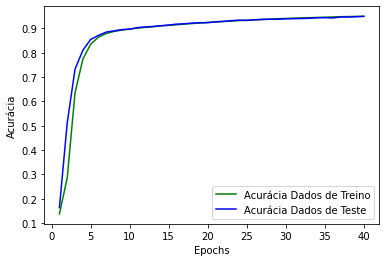

In [16]:
# Comandos para criar o gráfico com as variáveis de interesse:
acuracia_treino = historico.history['acc']
acuracia_teste = historico.history['val_acc']

epochs = range(1, len(acuracia_treino)+1) # Somou-se 1 ao final, pois o Python começa a contar de zero, logo (0, 39+1):

plt.plot(epochs, acuracia_treino, '-g', label='Acurácia Dados de Treino') # A letra g usada corresponde a cor verde (green)
plt.plot(epochs, acuracia_teste, '-b', label='Acurácia Dados de Teste') # A letra b usada corresponde a cor blue (azul)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()

In [17]:
# Promovendo um ESTRESSE ao modelo, rodamos ele novamente mudando o valor de epochs (épocas) para 200:
from keras.models import Sequential
from keras.layers import Dense, Activation
# Comando para definir o modelo:
modelo = Sequential()
modelo.add(Dense(30, input_dim=784, kernel_initializer='normal', activation='relu')) # Entrada e Primeira Camada Oculta
modelo.add(Dense(30, kernel_initializer='normal', activation='relu')) # Segunda Camada Oculta
modelo.add(Dense(10, kernel_initializer='normal', activation='softmax')) # Saída

In [18]:
# Comando para importar a função importante:
from keras.optimizers import SGD
otimizador = SGD()

In [19]:
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc']) # 'acc' é a métrica da acurácia!
historico = modelo.fit(x_treino_normalizado, y_treino_convertido, epochs=200, batch_size=100, validation_data=(x_teste_normalizado, y_teste_convertido), verbose=1)
# OBS: Foi utilizada uma variável chamada 'historico', para permitir criar um gráfico posteriormento, usando os dados armazenados na variável criada.

Epoch 1/200
600/600 [==============================] - 1s 1ms/step - loss: 2.2928 - acc: 0.2052 - val_loss: 2.2706 - val_acc: 0.3206
Epoch 2/200
600/600 [==============================] - 1s 1ms/step - loss: 2.1447 - acc: 0.3951 - val_loss: 1.8550 - val_acc: 0.4558
Epoch 3/200
600/600 [==============================] - 1s 2ms/step - loss: 1.3344 - acc: 0.6321 - val_loss: 0.8864 - val_acc: 0.7383
Epoch 4/200
600/600 [==============================] - 2s 3ms/step - loss: 0.7587 - acc: 0.7732 - val_loss: 0.6497 - val_acc: 0.8110
Epoch 5/200
600/600 [==============================] - 1s 2ms/step - loss: 0.6017 - acc: 0.8247 - val_loss: 0.5408 - val_acc: 0.8427
Epoch 6/200
600/600 [==============================] - 1s 2ms/step - loss: 0.5200 - acc: 0.8492 - val_loss: 0.4817 - val_acc: 0.8605
Epoch 7/200
600/600 [==============================] - 2s 3ms/step - loss: 0.4755 - acc: 0.8610 - val_loss: 0.4495 - val_acc: 0.8677
Epoch 8/200
600/600 [==============================] - 2s 3ms/step - 

Epoch 62/200
600/600 [==============================] - 1s 1ms/step - loss: 0.1336 - acc: 0.9615 - val_loss: 0.1476 - val_acc: 0.9558
Epoch 63/200
600/600 [==============================] - 1s 1ms/step - loss: 0.1320 - acc: 0.9622 - val_loss: 0.1464 - val_acc: 0.9557
Epoch 64/200
600/600 [==============================] - 1s 1ms/step - loss: 0.1304 - acc: 0.9626 - val_loss: 0.1486 - val_acc: 0.9542
Epoch 65/200
600/600 [==============================] - 1s 1ms/step - loss: 0.1290 - acc: 0.9629 - val_loss: 0.1454 - val_acc: 0.9570
Epoch 66/200
600/600 [==============================] - 1s 1ms/step - loss: 0.1273 - acc: 0.9635 - val_loss: 0.1437 - val_acc: 0.9574
Epoch 67/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1259 - acc: 0.9638 - val_loss: 0.1419 - val_acc: 0.9585
Epoch 68/200
600/600 [==============================] - 1s 1ms/step - loss: 0.1246 - acc: 0.9644 - val_loss: 0.1408 - val_acc: 0.9586
Epoch 69/200
600/600 [==============================] - 1s 1ms

Epoch 123/200
600/600 [==============================] - 1s 1ms/step - loss: 0.0774 - acc: 0.9776 - val_loss: 0.1217 - val_acc: 0.9654
Epoch 124/200
600/600 [==============================] - 1s 1ms/step - loss: 0.0769 - acc: 0.9785 - val_loss: 0.1234 - val_acc: 0.9642
Epoch 125/200
600/600 [==============================] - 1s 1ms/step - loss: 0.0764 - acc: 0.9782 - val_loss: 0.1220 - val_acc: 0.9660
Epoch 126/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0759 - acc: 0.9784 - val_loss: 0.1212 - val_acc: 0.9649
Epoch 127/200
600/600 [==============================] - 1s 1ms/step - loss: 0.0752 - acc: 0.9788 - val_loss: 0.1215 - val_acc: 0.9654
Epoch 128/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0747 - acc: 0.9788 - val_loss: 0.1221 - val_acc: 0.9650
Epoch 129/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0744 - acc: 0.9792 - val_loss: 0.1207 - val_acc: 0.9658
Epoch 130/200
600/600 [==============================] 

In [20]:
historico.history['acc']

[0.2052166610956192,
 0.39508333802223206,
 0.6321166753768921,
 0.7732166647911072,
 0.8246999979019165,
 0.8491500020027161,
 0.8610166907310486,
 0.8704000115394592,
 0.8761500120162964,
 0.8824499845504761,
 0.8877000212669373,
 0.892799973487854,
 0.8982833623886108,
 0.9021666646003723,
 0.906499981880188,
 0.909683346748352,
 0.9132999777793884,
 0.9159333109855652,
 0.9191666841506958,
 0.9207000136375427,
 0.9232666492462158,
 0.9253666400909424,
 0.9269166588783264,
 0.9290833473205566,
 0.9312499761581421,
 0.9328333139419556,
 0.9342333078384399,
 0.9355499744415283,
 0.9373000264167786,
 0.9383999705314636,
 0.9397833347320557,
 0.941100001335144,
 0.9423166513442993,
 0.9433833360671997,
 0.9442499876022339,
 0.9452333450317383,
 0.946066677570343,
 0.9465166926383972,
 0.9480000138282776,
 0.9487666487693787,
 0.9488166570663452,
 0.9509333372116089,
 0.9508166909217834,
 0.9516333341598511,
 0.9522166848182678,
 0.9530666470527649,
 0.9534000158309937,
 0.95426666736602

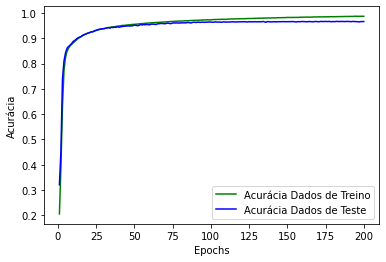

In [21]:
# Comandos para criar o gráfico com as variáveis de interesse:
acuracia_treino = historico.history['acc']
acuracia_teste = historico.history['val_acc']

epochs = range(1, len(acuracia_treino)+1) # Somou-se 1 ao final, pois o Python começa a contar de zero, logo (0, 39+1):

plt.plot(epochs, acuracia_treino, '-g', label='Acurácia Dados de Treino') # A letra g usada corresponde a cor verde (green)
plt.plot(epochs, acuracia_teste, '-b', label='Acurácia Dados de Teste') # A letra b usada corresponde a cor blue (azul)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()

In [22]:
# Observando os resultados com epochs=40 e posteriormento com epochs=200, verificamos que o valor da acurácia foi bom para ambos
# os casos, porém, apesar do valor final de acurácia no modelo estressado ter sido maior, (0.98 vs 0.95) constatamos através dos
# gráficos gerados que não adianta aumentar mais o valor das épocas, pois ao final o modelo de teste começa a se reduzir,
# enquanto o modelo de treino continua o mesmo ou aumenta, podendo gerar overfiting nos dados de treino.